<a href="https://colab.research.google.com/github/tribber93/MachineLearning/blob/main/KMeans_Latihan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset/02_Dataset_KMeans_Customer.csv')
X = dataset.iloc[:, 2:].values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   IDPelanggan             200 non-null    int64 
 1   Kelamin                 200 non-null    object
 2   Usia                    200 non-null    int64 
 3   Rating_belanja (1-100)  200 non-null    int64 
 4   Pendapatan (juta Rp)    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


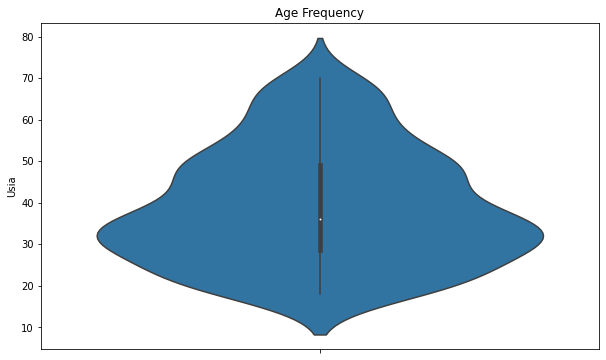

In [4]:
"""
## Gambaran Umum dari Dataset Konsumen

**Visualisasi karakteristik usia konsumen**
"""

plt.figure(figsize=(10,6))
plt.title('Age Frequency')
sns.axes_style('dark')
sns.violinplot(y=dataset['Usia'])
plt.show()

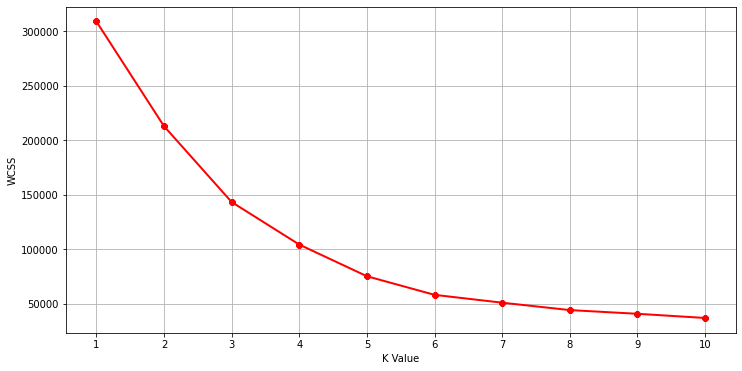

In [5]:
"""## Analisis jumlah cluster K-Means yang tepat dengan metode elbow"""

# mengimport library KMeans
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.grid(b=True)
plt.show()

In [6]:
"""Dari grafik diatas menunjukan bahwa data WCSS mulai melandai saat nilai K = 5, dengan demikian kemungkinan jumlah potensi cluster yang optimal adalah 5 cluster."""

dt_cons_kmean = dataset.copy()

X_data = dataset.iloc[:, 2:]
X_data

# Standarisasi Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_std = StandardScaler()
X_data = sc_std.fit_transform(X_data.values.astype(float))

In [7]:
"""**Implementasi K-mean dengan nilai cluster k=5**"""

# menghitung nilai k-mean untuk nilai k=5 (diperoleh dari metode elbow wcss)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(X_data)
dt_cons_kmean["label"] = clusters

dt_cons_kmean.head(10)

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp),label
0,1,Perempuan,23,87,29,1
1,2,Laki,60,4,30,3
2,3,Perempuan,21,73,30,1
3,4,Laki,53,4,33,3
4,5,Laki,18,92,33,1
5,6,Perempuan,49,14,33,3
6,7,Perempuan,21,81,33,1
7,8,Perempuan,42,17,34,3
8,9,Perempuan,30,73,34,1
9,10,Perempuan,36,26,37,3


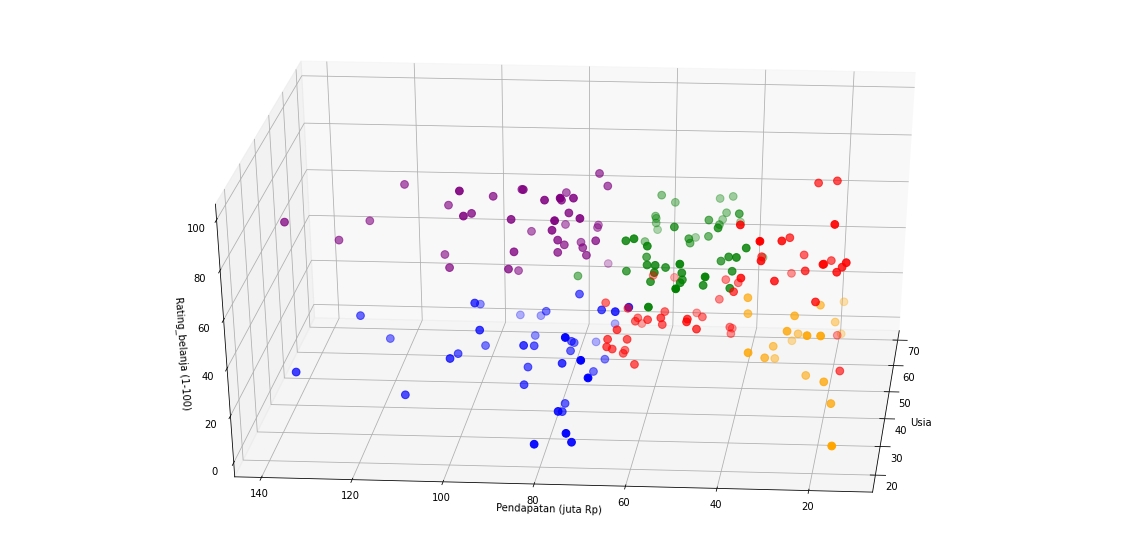

In [8]:
"""## Visualisasi data hasil prediksi K-means pada dataset Customers"""

# mengimport library untuk menggambar 3D karena menggunakan 3 atribut data sebagai dasar clustering
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dt_cons_kmean.Usia[dt_cons_kmean.label == 0],
           dt_cons_kmean['Pendapatan (juta Rp)'][dt_cons_kmean.label == 0],
           dt_cons_kmean['Rating_belanja (1-100)'][dt_cons_kmean.label == 0], c='blue', s=60)
ax.scatter(dt_cons_kmean.Usia[dt_cons_kmean.label == 1], 
           dt_cons_kmean["Pendapatan (juta Rp)"][dt_cons_kmean.label == 1], 
           dt_cons_kmean["Rating_belanja (1-100)"][dt_cons_kmean.label == 1], c='red', s=60)
ax.scatter(dt_cons_kmean.Usia[dt_cons_kmean.label == 2], 
           dt_cons_kmean["Pendapatan (juta Rp)"][dt_cons_kmean.label == 2], 
           dt_cons_kmean["Rating_belanja (1-100)"][dt_cons_kmean.label == 2], c='green', s=60)
ax.scatter(dt_cons_kmean.Usia[dt_cons_kmean.label == 3], 
           dt_cons_kmean["Pendapatan (juta Rp)"][dt_cons_kmean.label == 3], 
           dt_cons_kmean["Rating_belanja (1-100)"][dt_cons_kmean.label == 3], c='orange', s=60)
ax.scatter(dt_cons_kmean.Usia[dt_cons_kmean.label == 4], 
           dt_cons_kmean["Pendapatan (juta Rp)"][dt_cons_kmean.label == 4], 
           dt_cons_kmean["Rating_belanja (1-100)"][dt_cons_kmean.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Usia")
plt.ylabel("Pendapatan (juta Rp)")
ax.set_zlabel('Rating_belanja (1-100)')
plt.show()

In [9]:
"""Hasil visualisasi pada grafik scatter k-mean dapat dilihat bahwa semua data tersebar di ke-5 
titik centroid, meskipun dengan jumlah yang tidak sama. Jumlah titik data setiap centroid 
diperoleh melalui kode dan tabel berikut.
"""

#titik setiap pusat cluster (Centroid)
kmeans.cluster_centers_

#jumlah anggota setiap y_means hasil prediksi
unique, counts = np.unique(clusters, return_counts=True)
pd.DataFrame(np.asarray((unique+1, counts)).T, columns=['cluster ke-', 'jumlah'])

,cluster ke-,jumlah
0,1,39
1,2,54
2,3,47
3,4,20
4,5,40


In [10]:
"""Berdasarkan hasil perhitungan dan visualisasi, jumlah cluster yang optimal dari hasil WCCS adalah sebanyak 5 kelompok, dan hasil perhitungkan dengan KMean titik sentral kelompok berada di (0.07333084,-1.19729675,0.97494509),(-0.98067852,  0.46744035, -0.74305983),(1.20484056, -0.05236781, -0.23577338),(0.5310735 , -1.23646671, -1.2905084), dan (-0.42880597,  1.21608539,  0.97484722).dari ke-5 cluster, member cluster terbanyak adalah cluster 2 sedangkan jumlah anggota cluster terkecil adalah cluster 4.

Koefisien silhouette adalah ukuran kohesi dan pemisahan cluster. nilai ini akan  mengukur seberapa baik tiap titik data cocok dengan cluster yang diperoleh berdasarkan dua faktor:

- Seberapa dekat titik data dengan titik lain dalam cluster
- Seberapa jauh titik data dari titik di cluster lain

Nilai koefisien silhouette akan berkisar antara -1 dan 1. Bila nilai koefisien silhouette lebih besar maka menunjukkan bahwa sampel lebih dekat ke klasternya daripada ke klaster lainnya.
"""

from sklearn import metrics

metrics.silhouette_score(X_data, clusters)

"""Dari hasil diatas menunjukan bahwa nilai koefisien silhouette yang diperoleh adalah 0.4166 atau 41,66%"""

'Dari hasil diatas menunjukan bahwa nilai koefisien silhouette yang diperoleh adalah 0.4166 atau 41,66%'